## Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("heart.csv")
df.shape

(918, 12)

In [3]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().value_counts()

False    918
dtype: int64

In [8]:
# import libraries for plotting/ visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


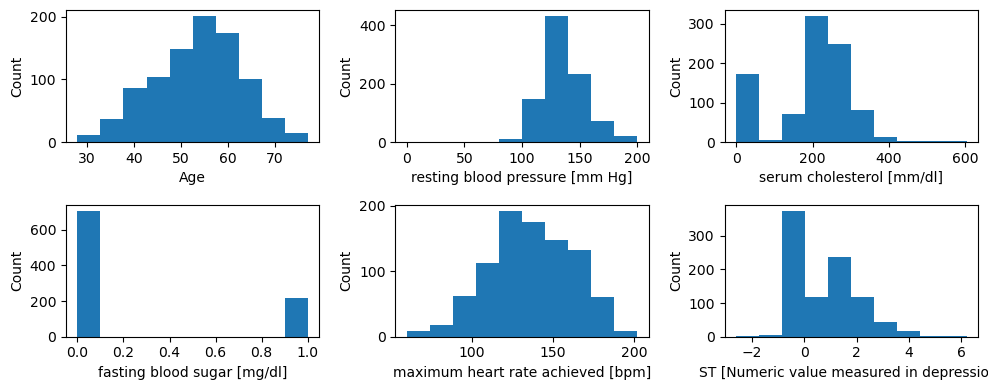

In [9]:
# plot each column (int and floats) in one graph (subplots)
fig, axes = plt.subplots(2,3, figsize=(10, 4))

axes[0,0].hist(df['Age'])
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Count')

axes[0,1].hist(df['RestingBP'])
axes[0,1].set_xlabel('resting blood pressure [mm Hg]')
axes[0,1].set_ylabel('Count')

axes[0,2].hist(df['Cholesterol'])
axes[0,2].set_xlabel('serum cholesterol [mm/dl]')
axes[0,2].set_ylabel('Count')

axes[1,0].hist(df['FastingBS'])
axes[1,0].set_xlabel('fasting blood sugar [mg/dl]')
axes[1,0].set_ylabel('Count')

axes[1,1].hist(df['MaxHR'])
axes[1,1].set_xlabel('maximum heart rate achieved [bpm]')
axes[1,1].set_ylabel('Count')

axes[1,2].hist(df['Oldpeak'])
axes[1,2].set_xlabel('ST [Numeric value measured in depression]')
axes[1,2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [10]:
# show value counts of object values
counts = df[['ST_Slope', 'Sex', 'ChestPainType']].value_counts()
print(counts)

ST_Slope  Sex  ChestPainType
Flat      M    ASY              274
Up        M    ASY              111
               ATA               89
               NAP               71
Flat      M    NAP               70
Up        F    ATA               49
Flat      F    ASY               44
Down      M    ASY               41
Up        F    NAP               34
               ASY               21
Flat      M    ATA               21
               TA                20
          F    NAP               18
Up        M    TA                13
Flat      F    ATA               11
Down      M    NAP                9
Up        F    TA                 7
Down      F    ASY                5
          M    TA                 3
               ATA                3
Flat      F    TA                 2
Down      F    NAP                1
               TA                 1
dtype: int64


In [11]:
counts = df[['RestingECG', 'ExerciseAngina']].value_counts()
print(counts)

RestingECG  ExerciseAngina
Normal      N                 345
            Y                 207
LVH         N                 115
ST          Y                  91
            N                  87
LVH         Y                  73
dtype: int64


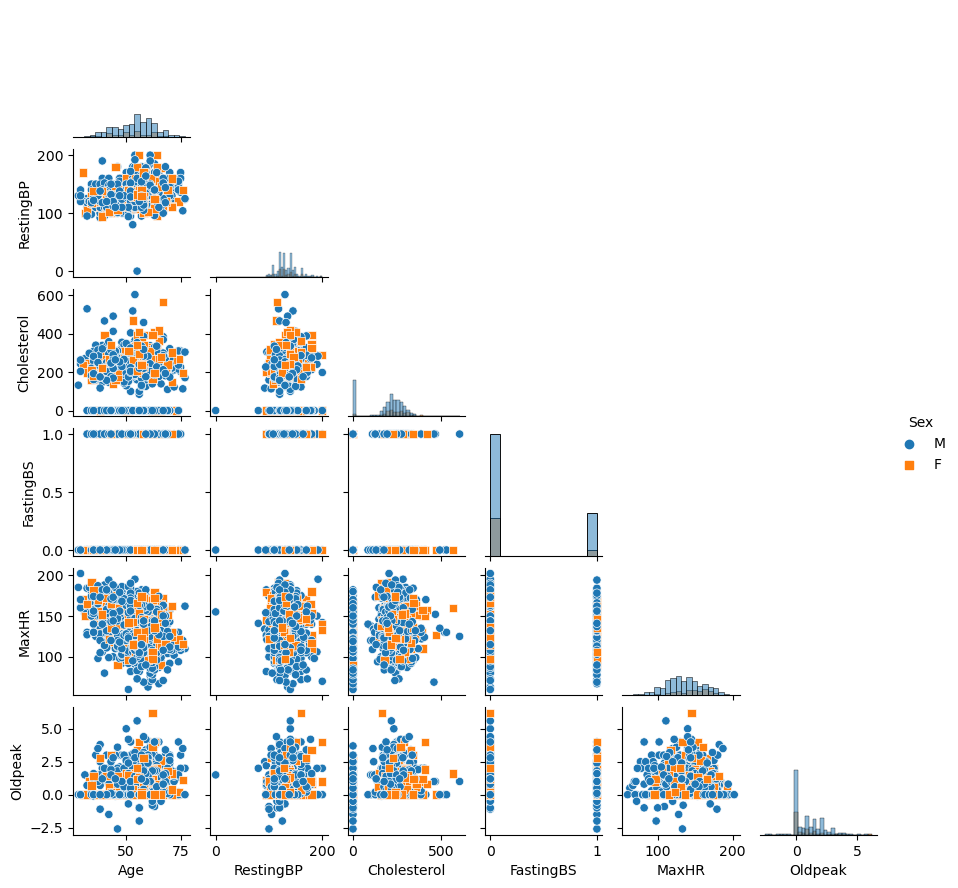

In [12]:
# Plot pairwise relationships in a dataset --> to get overview
# scatterplot and histplot

sns.pairplot(df, hue='Sex', corner=True, diag_kind="hist", markers=['o','s'], height=1.5,
    x_vars=["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"],
    y_vars=["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]
)
plt.show()


In [13]:
# Heart Diseases 1 vs 0
df[['HeartDisease', 'Sex']].value_counts(normalize=True)

HeartDisease  Sex
1             M      0.498911
0             M      0.290850
              F      0.155773
1             F      0.054466
dtype: float64

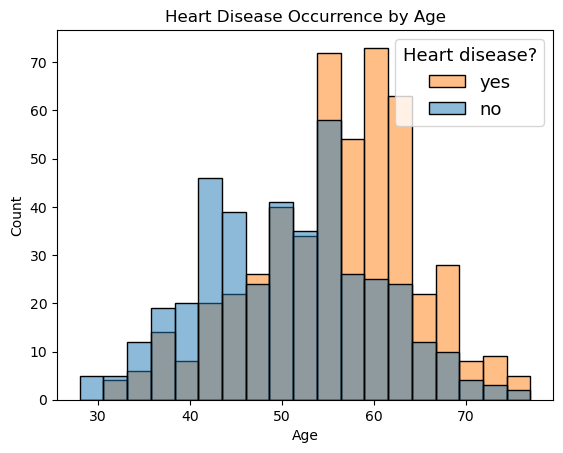

In [14]:
# Age related heart events
sns.histplot(df, x='Age', hue='HeartDisease')
plt.legend(['yes', 'no'], title='Heart disease?', title_fontsize=13, fontsize=13, loc=1)
plt.title('Heart Disease Occurrence by Age')
plt.show()

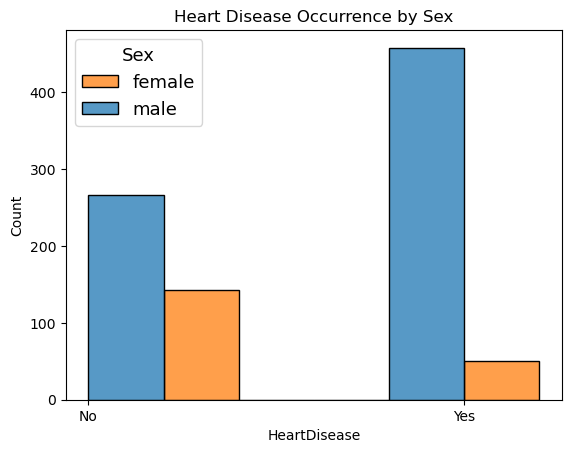

In [15]:
# Sex related heart events
ax = sns.histplot(df, x='HeartDisease', hue='Sex', multiple='dodge', binwidth=0.4)
plt.legend(['female', 'male'], title='Sex', title_fontsize=13, fontsize=13, loc=2)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
plt.title('Heart Disease Occurrence by Sex')
plt.show()